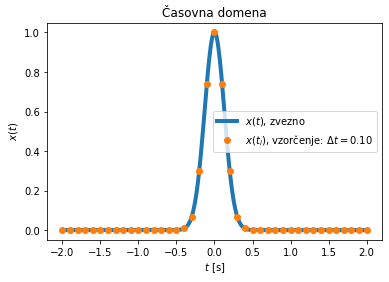

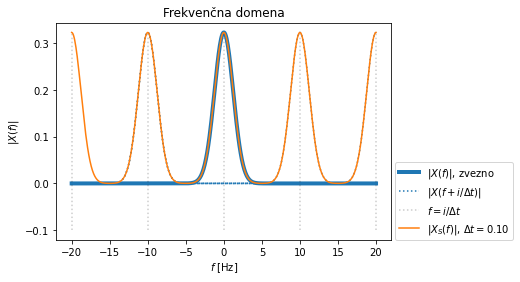

In [5]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# navodilo: spreminaj parameter `a`

t, f = sym.symbols('t, f', real=True)
n, Δt = sym.symbols('n, Δt')
a = sym.symbols('a', real=True, positive=True)
x = sym.exp(-a*t**2)
X = sym.fourier_transform(x, t, f)
Xsum = sym.Sum(X.subs(f, f-n/Δt), (n, -10, 10))

podatki = {a: 30, Δt: .1}
# pripravimo vektorizirane funkcije za numpy
f_x = sym.lambdify(t, x.subs(podatki), 'numpy')
f_X_abs = sym.lambdify(f, sym.Abs(X.subs(podatki)), 'numpy')
f_Xsum_abs = sym.lambdify(f, sym.Abs(Xsum.subs(podatki)), 'numpy')

# zaloga vrednosti v času in frekvenci (t_g so 'gosti' podatki za prikaz zvezne funkcije)
N = int(2/podatki[Δt]) # približno število -N, da imamo časovni trak cca [-2,2]
t_g = np.arange(-10*N,10*N+1)*podatki[Δt]/10
n = np.arange(-N,N+1)
t_i = n*podatki[Δt]
K = 2 # koliko sosednijih preslikav X(f) prikažemo
fr = np.linspace(-K/podatki[Δt],K/podatki[Δt], num=500)

plt.title('Časovna domena')
plt.plot(t_g, f_x(t_g), 'C0', label='$x(t)$, zvezno', linewidth=4)
plt.plot(t_i, f_x(t_i), color='C1', marker='o', ls='', label=f'$x(t_i)$, vzorčenje: $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

plt.title('Frekvenčna domena')
plt.plot(fr, f_X_abs(fr), 'C0', label='$|X(f)|$, zvezno', linewidth=4)
for i in range(-K,K):
    plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':')
    plt.vlines(i/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2)
plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':', label='$|X(f+i/\Delta t)|$')
plt.vlines((i+1)/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2, label='$f=i/\Delta t$')
plt.plot(fr, f_Xsum_abs(fr), color='C1', label=f'$|X_S(f)|$, $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$f$ [Hz]')
plt.ylabel('$|X(f)|$')
plt.legend(loc=(1.01,0))
plt.show()

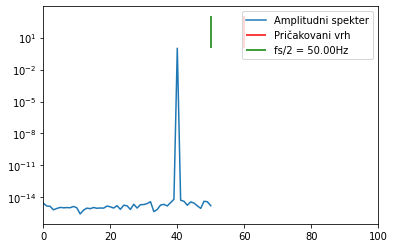

In [9]:
import matplotlib.pyplot as plt
import numpy as np

f = 60 # <<<<<<<<<<<<<<<<
T = 1.
N = 100
t, dt = np.linspace(-T/2, T/2, N, endpoint=False, retstep=True)
fs = 1/dt
x = np.cos(2*f*np.pi*t+0.33)

X1=np.fft.rfft(x)*2/len(x)

f1=np.fft.rfftfreq(len(x),dt)
plt.semilogy(f1, np.abs(X1), label='Amplitudni spekter');
plt.vlines(f, 1, 1000, 'r', label='Pričakovani vrh')
plt.vlines(fs/2, 1, 1000, 'g', label=f'fs/2 = {fs/2:3.2f}Hz')
plt.xlim(0, fs/2+50)
plt.legend();

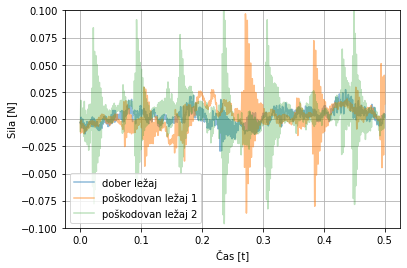

In [8]:
import numpy as np
import matplotlib.pyplot as plt

new = np.load('./data/bearing/new 1A.npy')
radial = np.load('./data/bearing/radial Low 1A.npy')
contamination = np.load('./data/bearing/contam low 2A.npy')
time = np.arange(len(new)) * 1./5000

sel = time<0.5
plt.plot(time[sel], new[sel, 2], alpha=0.5, label='dober ležaj')
plt.plot(time[sel], radial[sel, 2], alpha=0.5, label='poškodovan ležaj 1')
plt.plot(time[sel], contamination[sel, 2], alpha=0.3, label='poškodovan ležaj 2')
plt.xlabel('Čas [t]')
plt.ylabel('Sila [N]')
plt.ylim(-0.1, 0.1)
plt.grid()
plt.legend()
plt.show()

<>:12: DeprecationWarning: invalid escape sequence '\,'
<>:12: DeprecationWarning: invalid escape sequence '\,'
C:\Users\janko\AppData\Local\Temp\ipykernel_11048\1633494889.py:12: DeprecationWarning: invalid escape sequence '\,'
  plt.ylabel('FRF [m$\,$s$^{-2}$/N]')


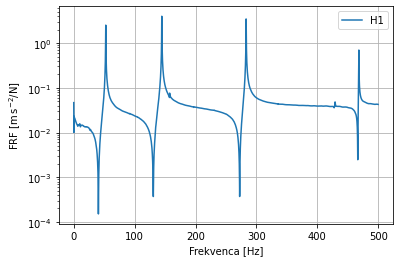

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pyuff

uff = pyuff.UFF('./data/uff/beam.uff').read_sets(setn=4)
fr = uff['x']
H1 = uff['data']

sel = fr<500
plt.semilogy(fr[sel], np.abs(H1[sel]), label='H1')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('FRF [m$\,$s$^{-2}$/N]')
plt.grid()
plt.legend()
plt.show()

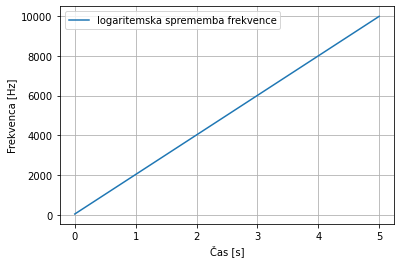

In [24]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 5
t = np.linspace(0,T,int(fs*T)+1)
x, _, fr = es.sine_sweep(time=t, freq_start=40, freq_stop=10000, mode='linear', freq_return=True)
display(Audio(data=x, rate=fs))

plt.plot(t, fr, label='logaritemska sprememba frekvence')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.grid()
plt.legend()
plt.show()

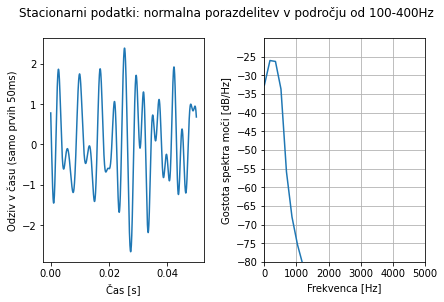

In [26]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
N = len(t)

M = N // 2 + 1 # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 100 # PSD lower frequency limit  [Hz]
freq_upper = 400 # PSD upper frequency limit [Hz]

PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD
x = es.random_gaussian(N, PSD, fs)

sel = t<0.05
display(Audio(data=x, rate=fs))


fig, axs = plt.subplots(1,2)
fig.suptitle(f'Stacionarni podatki: normalna porazdelitev v področju od {freq_lower}-{freq_upper}Hz')
plt.tight_layout(pad=1, w_pad=3)
axs[0].plot(t[sel], x[sel])
axs[0].set_xlabel('Čas [s]')
axs[0].set_ylabel('Odziv v času (samo prvih 50ms)')
axs[1].psd(x, Fs=fs)
axs[1].set_xlabel('Frekvenca [Hz]')
axs[1].set_ylabel('Gostota spektra moči [dB/Hz]')
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(-80, -20)
axs[1].set_yticks(np.arange(-80,-20,5))
plt.show()

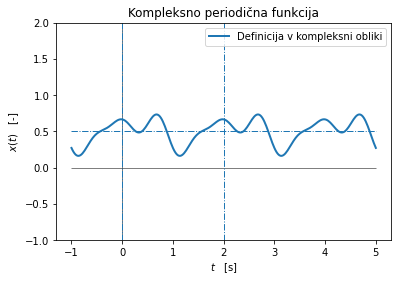

In [7]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 3
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

c = np.zeros(2*N+1, dtype='complex')
c[N+1:] = 0.5*a-0.5j*b
c[N] = a0/2
c[:N] = np.conj(c[N+1:])[::-1]

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += c[N+n]*np.exp(2j*np.pi*n*t/Tp)
    
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
    

fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodična funkcija')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]')
ax1.tick_params(axis='y')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Definicija v kompleksni obliki', c='C0', lw=2, alpha=1) 
ax1.vlines([0, Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.legend(loc=1)
plt.ylim(-1,2)
plt.show()

In [8]:
c

array([ 0.03557904+0.02008861j, -0.01651311-0.06695867j,
        0.06286511+0.05245006j,  0.5       +0.j        ,
        0.06286511-0.05245006j, -0.01651311+0.06695867j,
        0.03557904-0.02008861j])

In [16]:
n=0 # poskusite še druge vrednosti, tudi n>N!
sel = np.logical_and(t>=0, t<Tp)
np.trapz(x[sel]*np.exp(-2j*np.pi*n*t[sel]/Tp), dx=dt)/Tp

(0.4933542741467646+0j)

In [17]:
sel = np.logical_and(t>=0, t<=Tp)
np.trapz(x[sel]*np.exp(-2j*np.pi*n*t[sel]/Tp), dx=dt)/Tp

(0.5+0j)

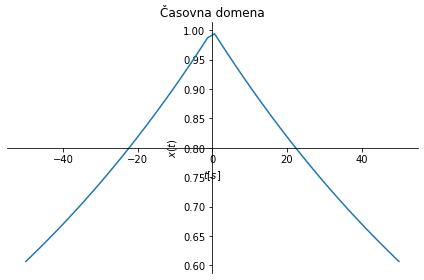

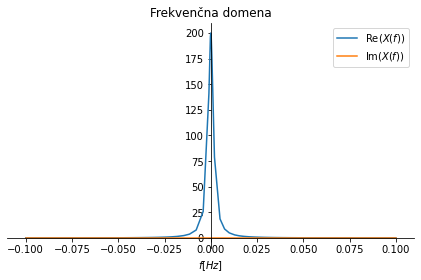

In [6]:
import sympy as sym
t, f = sym.symbols('t, f', real=True)
δ = sym.symbols('\delta', real=True, positive=True)
podatki = {δ: 0.01}
x = sym.exp(-δ*sym.Abs(t))
X = sym.fourier_transform(x, t, f)


sym.plot(x.subs(podatki), (t,-50,50), xlabel='$t [s]$', ylabel='$x(t)$', title='Časovna domena')
p1 = sym.plot(sym.re(X.subs(podatki)), (f,-.1,.1), xlabel='$f [Hz]$', label='Re$(X(f))$', ylabel='', title='Frekvenčna domena', show=False)
p2 = sym.plot(sym.im(X.subs(podatki)), (f,-.1,.1), line_color='C1', label='Im$(X(f))$', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

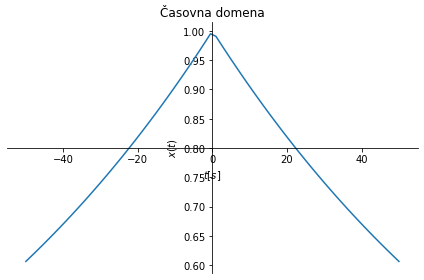

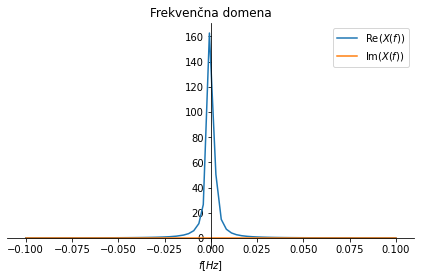

In [7]:
sym.plot(x.subs(podatki), (t,-50,50), xlabel='$t [s]$', ylabel='$x(t)$', title='Časovna domena')
p1 = sym.plot(sym.re(X.subs(podatki)), (f,-.1,.1), xlabel='$f [Hz]$', label='Re$(X(f))$', ylabel='', title='Frekvenčna domena', show=False)
p2 = sym.plot(sym.im(X.subs(podatki)), (f,-.1,.1), line_color='C1', label='Im$(X(f))$', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

In [2]:
import sympy as sym
t, t_0, f, τ = sym.symbols('t, t_0, f, tau', real=True)
a = sym.symbols('a', real=True, positive=True)
x = sym.Function('x')
i = sym.I
π = sym.pi
X = sym.integrate(x(t-t_0)*sym.exp(-i*2*π*f*t), (t, -sym.oo, +sym.oo))

sym.Eq(X, X.transform(t-t_0, τ))

Eq(Integral(x(t - t_0)*exp(-2*I*pi*f*t), (t, -oo, oo)), Integral(x(tau)*exp(-2*I*pi*f*(t_0 + tau)), (tau, -oo, oo)))

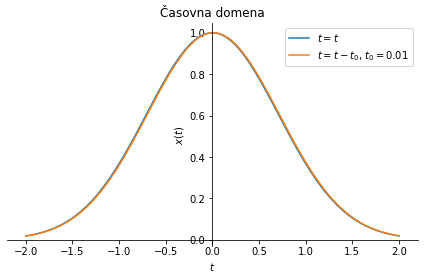

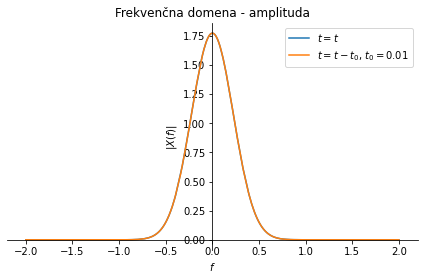

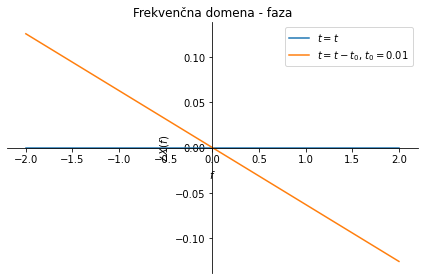

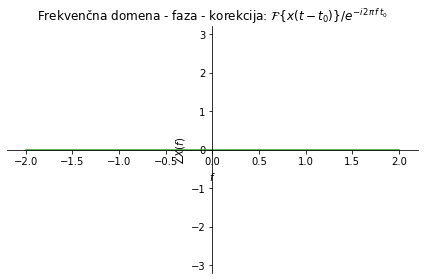

In [6]:
import sympy as sym
t, t_0, f, a = sym.symbols('t, t_0, f, a', real=True)
i = sym.I
π = sym.pi

x_1 = sym.exp(-t**2)
x_2 = x_1.subs(t, t-t_0)
podatki = {t_0: 0.01}

X_1 = sym.fourier_transform(x_1, t, f)
X_2 = sym.fourier_transform(x_2.subs(podatki), t, f)
X_3 = X_2/sym.exp(-i*2*π*f*t_0)


p1 = sym.plot(x_1.subs(podatki), (t, -2, +2), line_color='C0', 
              label=f'$t=t$', show=False, 
              title='Časovna domena', ylabel='$x(t)$', xlabel='$t$')
p2 = sym.plot(x_2.subs(podatki), (t, -2, +2), line_color='C1', 
              label=f'$t=t-t_0$, $t_0=${t_0.subs(podatki):3.2f}', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

p1 = sym.plot(sym.Abs(X_1).subs(podatki), (f, -2, +2), line_color='C0',
              label=f'$t=t$', show=False, 
              title='Frekvenčna domena - amplituda', ylabel='$|X(f)|$', xlabel='$f$')
p2 = sym.plot(sym.Abs(X_2).subs(podatki), (f, -2, +2), line_color='C1',
              label=f'$t=t-t_0$, $t_0=${t_0.subs(podatki):3.2f}', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

p1 = sym.plot(sym.arg(X_1).subs(podatki), (f, -2, +2), line_color='C0',
              label=f'$t=t$', show=False, 
              title='Frekvenčna domena - faza', ylabel='$\\angle X(f)$', xlabel='$f$')
p2 = sym.plot(sym.arg(X_2).subs(podatki), (f, -2, +2), line_color='C1',
              label=f'$t=t-t_0$, $t_0=${t_0.subs(podatki):3.2f}', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

p1 = sym.plot(sym.arg(X_3).subs(podatki), (f, -2, +2), line_color='C2',
              label=f'$t=t$', show=True, ylim=[-3.2, 3.2],
              title='Frekvenčna domena - faza - korekcija: $\mathcal{F}\{x(t-t_0)\} / e^{-i\,2\pi\,f\,t_0}$', ylabel='$\\angle X(f)$', xlabel='$f$')
p1.legend = True

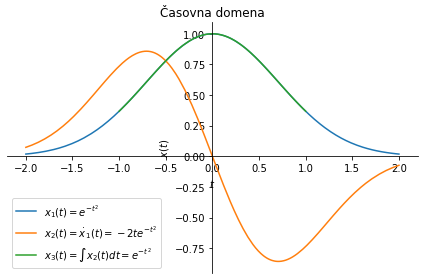

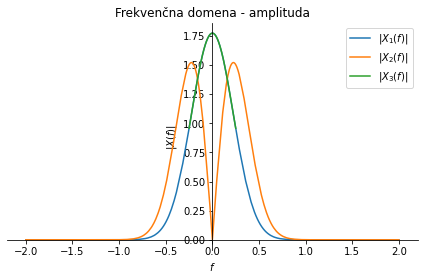

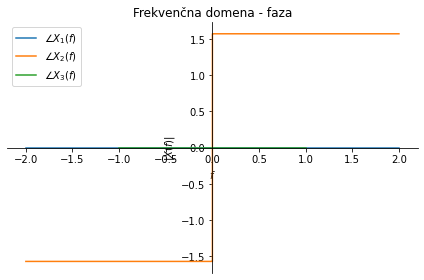

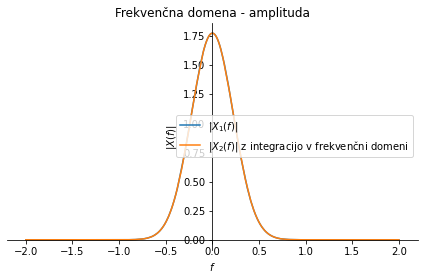

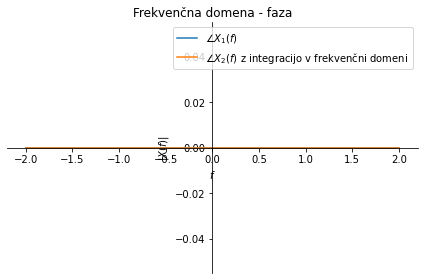

In [7]:
import sympy as sym
t, f = sym.symbols('t, f', real=True)
i = sym.I
π = sym.pi

x_1 = sym.exp(-t**2)
x_2 = sym.diff(x_1, t)
x_3 = sym.integrate(x_2, t)

X_1 = sym.fourier_transform(x_1, t, f)
X_2 = sym.fourier_transform(x_2, t, f)
X_3 = sym.fourier_transform(x_3, t, f)

p1 = sym.plot(x_1, (t, -2, +2), line_color='C0', 
              label=f'$x_1(t)={sym.latex(x_1)}$', show=False,
              title='Časovna domena', ylabel='$x(t)$', xlabel='$t$')
p2 = sym.plot(x_2, (t, -2, +2), line_color='C1', 
              label=f'$x_2(t)=\dot x_1(t)={sym.latex(x_2)}$', show=False)
p3 = sym.plot(x_3, (t, -1, +1), line_color='C2', 
              label=f'$x_3(t)=\int x_2(t)dt={sym.latex(x_3)}$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

p1 = sym.plot(sym.Abs(X_1), (f, -2, +2), line_color='C0',
              label=f'$|X_1(f)|$', show=False, 
              title='Frekvenčna domena - amplituda', ylabel='$|X(f)|$', xlabel='$f$')
p2 = sym.plot(sym.Abs(X_2), (f, -2, +2), line_color='C1',
              label=f'$|X_2(f)|$', show=False)
p3 = sym.plot(sym.Abs(X_3), (f, -.25, +.25), line_color='C2',
              label=f'$|X_3(f)|$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

p1 = sym.plot(sym.arg(X_1), (f, -2, +2), line_color='C0',
              label=f'$\\angle X_1(f)$', show=False, 
              title='Frekvenčna domena - faza', ylabel='$|X(f)|$', xlabel='$f$')
p2 = sym.plot(sym.arg(X_2), (f, -2, +2), line_color='C1',
              label=f'$\\angle X_2(f)$', show=False)
p3 = sym.plot(sym.arg(X_3), (f, -1, +1), line_color='C2',
              label=f'$\\angle X_3(f)$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

p1 = sym.plot(sym.Abs(X_1), (f, -2, +2), line_color='C0',
              label=f'$|X_1(f)|$', show=False, 
              title='Frekvenčna domena - amplituda', ylabel='$|X(f)|$', xlabel='$f$')
p2 = sym.plot(sym.Abs(X_2/(2*i*π*f)), (f, -2, +2), line_color='C1',
              label=f'$|X_2(f)|$ z integracijo v frekvenčni domeni', show=False)
p1.extend(p2)
p1.legend = True
p1.show()

p1 = sym.plot(sym.arg(X_1), (f, -2, +2), line_color='C0',
              label=f'$\\angle X_1(f)$', show=False, 
              title='Frekvenčna domena - faza', ylabel='$|X(f)|$', xlabel='$f$')
p2 = sym.plot(sym.arg(X_2/(2*i*π*f)), (f, -2, +2), line_color='C1',
              label=f'$\\angle X_2(f)$ z integracijo v frekvenčni domeni', show=False)
p1.extend(p2)
p1.legend = True
p1.show()